In [5]:
import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)

db = sqlite3.connect('setlists.sqlite')
dead = pd.read_sql_query('select * from GD_SHOWS;',db)
dead.tail()

,date,venue,city,state,setlist
2351,1972-07-26,Paramount Theatre,Portland,OR,Set 1>Cold Rain And Snow>Black Throated Wind>Mississippi Half-Step>Mexicali Blues>Sugaree>El Paso>China Cat Sunflower>I Know You Rider>Jack Straw>Tennessee Jed>Playin' In The Band>Casey Jones>Set 2>The Promised Land>He's Gone>Me And My Uncle>You Win Again>Greatest Story Ever Told>Ramble On Rose>Dark Star>Comes A Time>Sugar Magnolia>Brown-Eyed Women>Beat It On Down The Line>Stella Blue>Not Fade Away>Goin' Down The Road Feeling Bad>Not Fade Away>Encore>One More Saturday Night
2352,1970-11-12,46th Street Rock Palace,Brooklyn,NY,Unknown
2353,1969-04-04,Avalon Ballroom,San Francisco,CA,Set 1>Good Morning Little School Girl>Doin' That Rag>Cryptical Envelopment>Drums>The Other One>Cryptical Envelopment>Death Don't Have No Mercy>Set 2>Turn On Your Love Light>Dark Star>St. Stephen>The Eleven>Feedback>
2354,1971-12-09,Fox Theatre,St. Louis,MO,Set 1>Truckin'>Brown-Eyed Women>Mr. Charlie>Jack Straw>Sugaree>Beat It On Down The Line>It Hurts Me Too>Tennessee Jed>El Paso>Run Rudolph Run>Black Peter>Playin' In The Band>Casey Jones>One More Saturday Night>Set 2>Ramble On Rose>Mexicali Blues>Big Boss Man>Sugar Magnolia>Not Fade Away>Goin' Down The Road Feeling Bad>Not Fade Away
2355,1971-01-24,Seattle Center Arena,Seattle,WA,Set 1>Truckin'>China Cat Sunflower>I Know You Rider>It Hurts Me Too>Cumberland Blues>Casey Jones>Sugar Magnolia>Set 2>Hard To Handle>Turn On Your Love Light>Not Fade Away>Goin' Down The Road Feeling Bad>Turn On Your Love Light>Drums>Good Lovin'


In [6]:
#drop first duplicate concert entries
dead = dead.drop_duplicates(subset='date',keep='last')
dead.shape #over 2300 shows in 30 year career

(2308, 5)

In [7]:
#sort by show date and set as index
dead['date'] = pd.to_datetime(dead['date'])
dead = dead.set_index(['date'])
dead = dead.sort_index()
dead.tail()

,venue,city,state,setlist
date,,,,
1995-07-02,Deer Creek Amphitheater,Noblesville,IN,Set 1>Here Comes Sunshine>Walkin' Blues>Dire Wolf>It's All Over Now>Broken Arrow>Desolation Row>Tennessee Jed>Let It Grow>Set 2>Scarlet Begonias>Fire On The Mountain>Victim Or The Crime>It's All Too Much>New Speedway Boogie>Drums>Space>Attics Of My Life>Sugar Magnolia>Encore>The Mighty Quinn
1995-07-05,Riverport Amphitheatre,Maryland Heights,MO,Set 1>Feel Like A Stranger>Peggy-O>The Same Thing>Loose Lucy>Childhood's End>El Paso>Don't Ease Me In>Set 2>Iko Iko>Playin' In The Band>Crazy Fingers>Corrina>Rhythm Devils>Space>Goin' Down The Road Feeling Bad>Throwin' Stones>Not Fade Away>Encore>Black Muddy River
1995-07-06,Riverport Amphitheatre,Maryland Heights,MO,Set 1>Mississippi Half-Step>Take Me To The River>Big Boss Man>Me And My Uncle>Big River>Brown-Eyed Women>Cassidy>Set 2>Eyes Of The World>Unbroken Chain>Samba In The Rain>Truckin'>He's Gone>Drums>Space>The Last Time>Stella Blue>Around And Around>Encore>Liberty
1995-07-08,Soldier Field,Chicago,IL,Set 1>Jack Straw>Sugaree>Wang Dang Doodle>Althea>Queen Jane Approximately>Tennessee Jed>Eternity>Don't Ease Me In>Set 2>China Cat Sunflower>I Know You Rider>It's All Too Much>Saint Of Circumstance>Terrapin Station>Drums>Space>The Other One>Visions Of Johanna>One More Saturday Night>Encore>U.S. Blues
1995-07-09,Soldier Field,Chicago,IL,Set 1>Touch Of Grey>Little Red Rooster>Lazy River Road>When I Paint My Masterpiece>Childhood's End>Cumberland Blues>Promised Land>Set 2>Shakedown Street>Samson And Delilah>So Many Roads>Samba In The Rain>Corrina>Drums>Space>Unbroken Chain>Sugar Magnolia>Encore>Black Muddy River>Box Of Rain


In [8]:
dead[dead['setlist']=='Unknown'].shape #305 shows with unknown setlists

(305, 4)

In [9]:
dead.loc['1973-11-20'] #can search by show date

venue      Denver Coliseum                                                                                                                                                                                                                                                                                                                                                                                                                                                       
city       Denver                                                                                                                                                                                                                                                                                                                                                                                                                                                                
state      CO                                                       

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
years = dead.index.year.unique()
num_shows = []
for y in years:
    num_shows.append(sum(dead.index.year==y))
num_shows = np.array(num_shows)

yearly_shows = pd.DataFrame({'year':years,'num_shows':num_shows})
yearly_shows = yearly_shows.set_index('year')
yearly_shows.head()

,num_shows
year,
1965,15
1966,101
1967,110
1968,125
1969,138


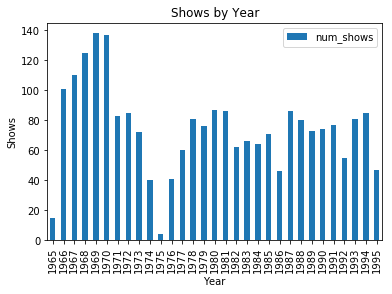

In [12]:
yearly_shows.plot(kind='bar')
plt.title('Shows by Year')
plt.xlabel('Year')
plt.ylabel('Shows')
plt.show()

In [13]:
num_shows.mean() #Over 74 shows per year for 30 years

74.451612903225808

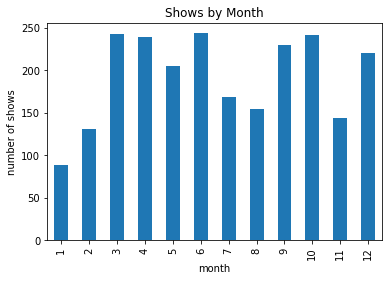

In [15]:
months = dead.index.month.unique()
monthly_totals = []
for m in months:
    monthly_totals.append(sum(dead.index.month==m))
monthly_totals = np.array(monthly_totals)
monthly_shows = pd.DataFrame({'month':months,'monthly_shows':monthly_totals})
monthly_shows = monthly_shows.sort_values(by='month')
monthly_shows = monthly_shows.set_index('month')
monthly_shows
monthly_shows.plot(kind='bar',legend=False)
plt.title('Shows by Month')
plt.xlabel('month')
plt.ylabel('number of shows')
plt.show()

In [16]:
states = dead.groupby('state')['setlist'].count()
states = states.sort_values(ascending=False)
states.head(10)

state
CA    867
NY    286
PA    100
MA    84 
IL    79 
NJ    54 
CO    49 
OR    48 
OH    47 
MD    42 
Name: setlist, dtype: int64

In [17]:
#create list of US-only shows
US_states = []
for st in states.index:
    if len(st) < 3 and st != '':
        US_states.append(st)
US_states = states[US_states]
len(US_states)

46

In [18]:
import plotly
import plotly.plotly as py
py.sign_in('mwilkinson','IYneBLfyXmdrdOhVkRwr') #plotly API key
print(plotly.__version__) #plotly version
plotly.offline.init_notebook_mode() #run at the start

2.0.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [129]:
scale = [[0.0, 'rgb(242,240,247)'],[0.01, 'rgb(218,218,235)'],[0.03, 'rgb(188,189,220)'],\
            [0.08, 'rgb(158,154,200)'],[0.3, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#dataset to be graphed; this is from plotly with values adjusted for our dataset
mydata = [dict(type='choropleth',colorscale=scale,locations=US_states.index,z=US_states,locationmode='USA-states',text=US_states.index,hoverinfo='location+z',marker=dict(line=dict(color='rgb(255,255,255)',width=2)),colorbar=dict(title='Shows by Location'))]
mylayout = dict(title='Grateful Dead Shows by US State<br />(Hover for # Shows)',geo=dict(scope='USA',projection=dict(type='albers usa'),showlakes=True,lakecolor='rgb(95,145,237)'))
fig = dict(data=mydata, layout=mylayout)
py.iplot(fig,validate=False,filename='GD States Map')

In [178]:
#top 10 played venues
dead.groupby(['venue','state'])['setlist'].count().sort_values(ascending=False)[:10]

venue                                    state
Oakland Coliseum Arena                   CA       66
Winterland Arena                         CA       59
The Spectrum                             PA       53
Madison Square Garden                    NY       52
Fillmore West                            CA       43
Fillmore Auditorium                      CA       43
Nassau Coliseum                          NY       42
Shoreline Amphitheatre                   CA       39
Avalon Ballroom                          CA       30
Greek Theater, University Of California  CA       29
Name: setlist, dtype: int64

In [21]:
def get_setlist(show):
    setlist = dead.loc[show]['setlist']
    setlist = setlist.split('>')
    return setlist

In [22]:
repertoire = {}
for show in dead.index:
    setlist = get_setlist(show)
    for song in setlist:
        if song not in repertoire and song not in ['Unknown','Set 1','Set 2','Set 3','Encore','']:
            repertoire[song] = {'debut_year':show.year,'debut_show':show,'plays':1}
        elif song in repertoire:
            repertoire[song]['plays'] += 1

In [179]:
#top 10 most played songs throughout career all with early debut
songs = pd.DataFrame.from_dict(repertoire,orient='index')
songs = songs.sort_values(by='plays',ascending=False)
songs[:10]

,debut_year,debut_show,plays
Drums,1967,1967-09-29,1648
Playin' In The Band,1971,1971-02-18,692
Not Fade Away,1968,1968-06-19,639
The Other One,1967,1967-06-28,619
Me And My Uncle,1966,1966-11-29,604
Sugar Magnolia,1970,1970-06-07,587
I Know You Rider,1965,1965-11-03,538
China Cat Sunflower,1968,1968-01-17,537
Truckin',1970,1970-08-18,517
Good Lovin',1966,1966-05-19,492


In [180]:
len(songs)

537

In [181]:
#shift date to 1970 and very different set of songs
songs[songs['debut_year']>1970][:10]

,debut_year,debut_show,plays
Playin' In The Band,1971,1971-02-18,692
Jack Straw,1971,1971-10-19,473
Mexicali Blues,1971,1971-10-19,434
Tennessee Jed,1971,1971-10-19,430
Deal,1971,1971-02-19,419
Promised Land,1971,1971-05-29,416
Looks Like Rain,1972,1972-03-21,413
Wharf Rat,1971,1971-02-18,395
Big River,1971,1971-12-31,395
Estimated Prophet,1977,1977-02-26,389


In [26]:
#this list doesn't take into account play frequency -- look at popularity - frequency since debut
shows_after = []
for song in songs.index:
    debut = songs.loc[song]['debut_show']
    after = len(dead.loc[debut:])
    shows_after.append(after)
shows_after = np.array(shows_after)
songs['career_frequency'] = songs['plays'] / shows_after
songs = songs.sort_values(by='career_frequency',ascending=False)
songs[:10]

,debut_year,debut_show,plays,career_frequency
Drums,1967,1967-09-29,1648,0.784388
Playin' In The Band,1971,1971-02-18,692,0.412396
Samba In The Rain,1994,1994-06-08,38,0.348624
Long Way To Go Home,1992,1992-02-24,91,0.342105
Sugar Magnolia,1970,1970-06-07,587,0.335046
Rhythm Devils,1995,1995-06-30,2,0.333333
Not Fade Away,1968,1968-06-19,639,0.315244
Lazy River Road,1993,1993-02-21,66,0.314286
Truckin',1970,1970-08-18,517,0.298327
Jack Straw,1971,1971-10-19,473,0.290541


In [104]:
#only look at songs with 100+ plays
popular_songs = songs[songs['plays']>100]
popular_songs.head(10)

,debut_year,debut_show,plays,career_frequency
Drums,1967,1967-09-29,1648,0.784388
Playin' In The Band,1971,1971-02-18,692,0.412396
Sugar Magnolia,1970,1970-06-07,587,0.335046
Not Fade Away,1968,1968-06-19,639,0.315244
Truckin',1970,1970-08-18,517,0.298327
Jack Straw,1971,1971-10-19,473,0.290541
The Other One,1967,1967-06-28,619,0.290474
Throwin' Stones,1982,1982-09-17,266,0.289130
Estimated Prophet,1977,1977-02-26,389,0.286662
Me And My Uncle,1966,1966-11-29,604,0.273675


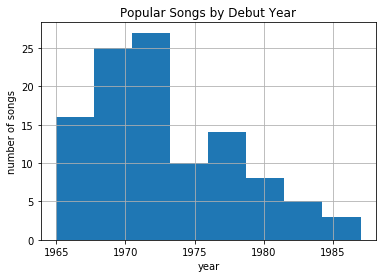

In [105]:
popular_songs['debut_year'].hist(bins=8)
plt.title('Popular Songs by Debut Year')
plt.yticks(range(0,30,5))
plt.xlabel('year')
plt.ylabel('number of songs')
plt.show()

In [38]:
#look at yearly rate songs are played
yearly_freq = {}
for song in popular_songs.index:
    yearly_freq[song] = {}
    for year in yearly_shows.index:
        yearly_freq[song][year] = 0
        
    dbt_yr = popular_songs.loc[song]['debut_year']
    dbt_shw = popular_songs.loc[song]['debut_show']
    for y in range(dbt_yr,1996):
        if y == dbt_yr:
            sets = dead[dead.index.year==y][dbt_shw:]
        else:
            sets = dead[dead.index.year==y]
        n_shows = len(sets)
        n_plays = 0
        for s in sets.index:
            if song in get_setlist(s):
                n_plays += 1
        freq = n_plays / n_shows
        yearly_freq[song][y] = freq

In [39]:
song_rate = pd.DataFrame.from_dict(yearly_freq,orient='index')
song_rate = song_rate.round(4)
song_rate.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Alabama Getaway,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.6250,0.5862,0.2674,0.1935,0.1515,0.1250,0.0845,0.1087,0.0349,0.0375,0.0274,0.0000,0.0000,0.0000,0.0000,0.0000,0.0851
All Along The Watchtower,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3585,0.2500,0.1781,0.1892,0.2078,0.2000,0.1605,0.1647,0.0851
Alligator,0.0,0.0,0.1048,0.1200,0.1522,0.0511,0.0120,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Althea,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.4762,0.6782,0.5116,0.3387,0.1818,0.1719,0.1268,0.1304,0.1279,0.1125,0.0959,0.1081,0.1558,0.1818,0.1728,0.1529,0.1277
And We Bid You Goodnight,0.0,0.0,0.0000,0.0755,0.1232,0.0584,0.0361,0.0,0.0556,0.05,0.0,0.0244,0.0,0.0123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0822,0.0541,0.0130,0.0000,0.0000,0.0000,0.0000


In [106]:
def plot_song_popularity(songs,title,legend):
    for song in songs:
        song_rate.loc[song].plot(legend=legend)
    plt.title(title)
    plt.xlabel('year')
    plt.ylabel('setlist appearance rate')
    plt.show()

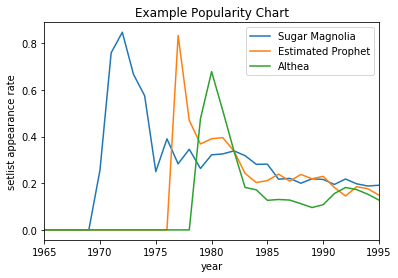

In [114]:
plot_song_popularity(['Sugar Magnolia','Estimated Prophet','Althea'],'Example Popularity Chart',True)

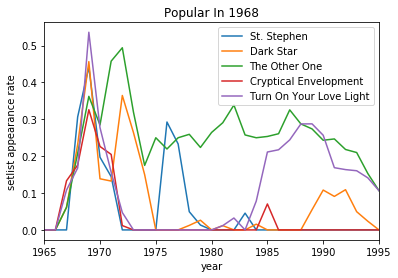

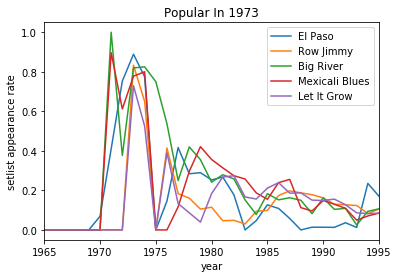

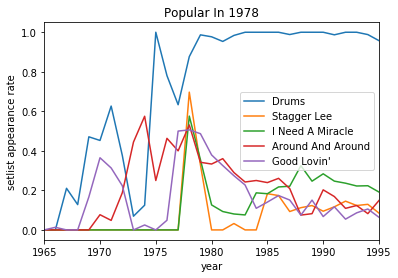

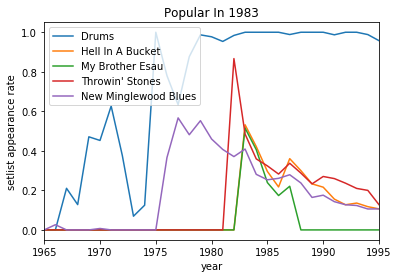

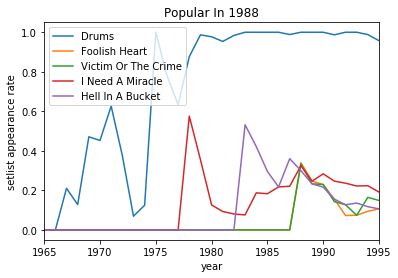

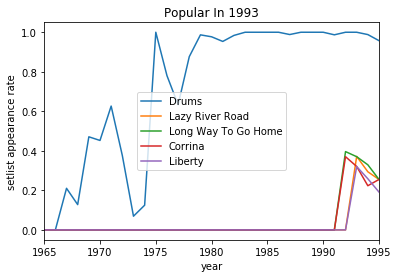

In [183]:
plot_song_popularity(song_rate.sort_values(by=1968,ascending=False)[:5].index,'Popular In 1968',True)
plot_song_popularity(song_rate.sort_values(by=1973,ascending=False)[:5].index,'Popular In 1973',True)
plot_song_popularity(song_rate.sort_values(by=1978,ascending=False)[:5].index,'Popular In 1978',True)
plot_song_popularity(song_rate.sort_values(by=1983,ascending=False)[:5].index,'Popular In 1983',True)
plot_song_popularity(song_rate.sort_values(by=1988,ascending=False)[:5].index,'Popular In 1988',True)
plot_song_popularity(song_rate.sort_values(by=1993,ascending=False)[:5].index,'Popular In 1993',True)

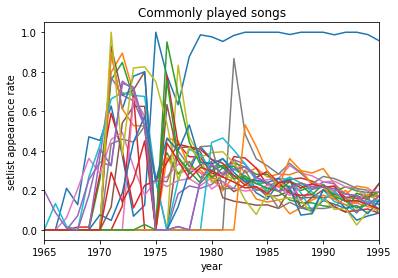

In [187]:
plot_song_popularity(popular_songs[:25].index,'Commonly played songs',False)

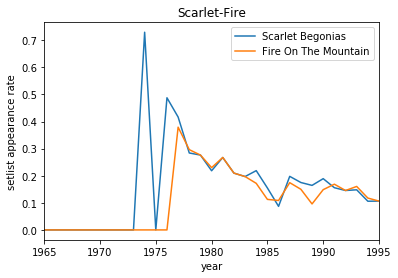

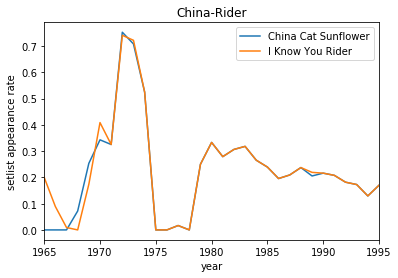

In [119]:
#most popular 2-song combos
plot_song_popularity(['Scarlet Begonias','Fire On The Mountain'],'Scarlet-Fire',True)
plot_song_popularity(['China Cat Sunflower','I Know You Rider'],'China-Rider',True)

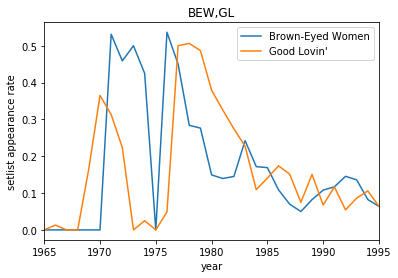

In [132]:
plot_song_popularity(['Brown-Eyed Women',"Good Lovin'"],'BEW,GL',True)

In [162]:
max_pop = song_rate.idxmax(axis=1)
peak_pop = []
for song in popular_songs.index:
     peak_pop.append(max_pop[song])
peak_pop = np.array(peak_pop)
popular_songs['peak_pop'] = peak_pop
popular_songs.head()

/Users/mclainwilkinson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,debut_year,debut_show,plays,career_frequency,peak_pop
Drums,1967,1967-09-29,1648,0.784388,1975
Playin' In The Band,1971,1971-02-18,692,0.412396,1972
Sugar Magnolia,1970,1970-06-07,587,0.335046,1972
Not Fade Away,1968,1968-06-19,639,0.315244,1971
Truckin',1970,1970-08-18,517,0.298327,1971


In [191]:
late_bloom = popular_songs[popular_songs['peak_pop']>popular_songs['debut_year']+10]
late_bloom

,debut_year,debut_show,plays,career_frequency,peak_pop
Good Lovin',1966,1966-05-19,492,0.216931,1978
New Minglewood Blues,1966,1966-05-19,416,0.183422,1977
Space,1972,1972-10-24,267,0.174168,1991
Don't Ease Me In,1966,1966-07-16,313,0.139049,1981
Walkin' Blues,1966,1966-10-07,141,0.063314,1989
Baby Blue,1966,1966-07-30,126,0.056050,1983


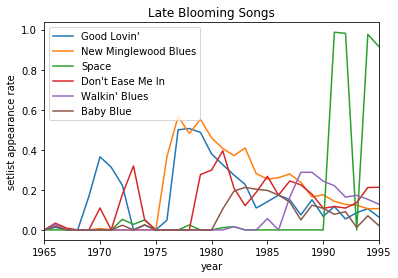

In [192]:
plot_song_popularity(late_bloom.index,'Late Blooming Songs',True)